In [1]:
#import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# # Replace 'YOUR_ACCESS_TOKEN' with your actual Spotify access token
# access_token = "BQBhFAwMYIJBm4nBvc7Rn951IbPWGzhHx44nJ9MSaK7P7FAd03x63QjrKMf6xqX26P7UYH415W__UKuawxy5el-oWdeR4Zg3a3UtBLQezZZtN_d4C1k"

# # Spotify API endpoint for the artist
# url = "https://api.spotify.com/v1/audio-analysis/2A6yzRGMgSQCUapR2ptm6A"

# # Set the headers with the Authorization token
# token = {
#     "Authorization": f"Bearer {access_token}"
# }

# # Make the GET request
# response = requests.get(url, headers=token).json()

# print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
data = "./resources/Spotify_Youtube.csv"
spot_yt_df = pd.read_csv(data)

In [4]:
#clean DF for analysis and add new columns
spot_yt_df["Views"] = spot_yt_df["Views"].fillna(0)
spot_yt_df["Stream"] = spot_yt_df["Stream"].fillna(0)
spot_yt_df["Danceability"] = spot_yt_df["Danceability"].fillna(0)

# Add "Views" and "Stream" together and create a new column "Combined Data"

spot_yt_df['Combined Views and Streams'] = (spot_yt_df['Stream'] + spot_yt_df['Views'])


spot_yt_df['YouTube Rank'] = spot_yt_df['Views'].rank(ascending=False, method='min')
spot_yt_df['Spotify Rank'] = spot_yt_df['Stream'].rank(ascending=False, method='min')
spot_yt_df['Overall Rank'] = spot_yt_df['Combined Views and Streams'].rank(ascending=False, method='min')


spot_yt_df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Likes,Comments,Description,Licensed,official_video,Stream,Combined Views and Streams,YouTube Rank,Spotify Rank,Overall Rank
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,1.733790e+09,538.0,350.0,370.0
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,3.820954e+08,4973.0,2298.0,3101.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,7.149852e+07,11714.0,8816.0,10624.0
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,6.464185e+08,2178.0,1536.0,1723.0
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,1.235741e+09,655.0,908.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,9.298822e+06,18990.0,17205.0,18215.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,1.106292e+07,18333.0,16753.0,17892.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,6.261756e+06,19380.0,18065.0,18901.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06,6.880494e+06,19911.0,17902.0,18776.0


In [5]:
#YT views vs spotify streams - Bryan
yt_vs_spotify = spot_yt_df[["Artist", "Track", "Album", "Views", "Stream", "Combined Views and Streams", "YouTube Rank", "Spotify Rank", "Overall Rank"]]

# Sort the DataFrame by "Combined Views and Streams" in descending order
yt_vs_spotify = yt_vs_spotify.sort_values(by="Combined Views and Streams", ascending=False).reset_index(drop=True)

# Convert the DataFrame to string type
yt_vs_spotify = yt_vs_spotify.astype(str)

yt_vs_spotify


,Artist,Track,Album,Views,Stream,Combined Views and Streams,YouTube Rank,Spotify Rank,Overall Rank
0,Luis Fonsi,Despacito,VIDA,8079649362.0,1506598267.0,9586247629.0,1.0,111.0,1.0
1,Daddy Yankee,Despacito,VIDA,8079646911.0,1506598267.0,9586245178.0,2.0,111.0,2.0
2,Ed Sheeran,Shape of You,÷ (Deluxe),5908398479.0,3362005201.0,9270403680.0,3.0,2.0,3.0
3,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),5773798407.0,1521254554.0,7295052961.0,4.0,105.0,4.0
4,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),5773797147.0,1521254554.0,7295051701.0,5.0,105.0,5.0
...,...,...,...,...,...,...,...,...,...
20713,Milionário & José Rico,Sonhei com você,"Milionário e José Rico ""Edição Especial""",0.0,0.0,0.0,20248.0,20143.0,20698.0
20714,Santiago Ziesmer,Kapitel 5.2 & Kapitel 6.1 - Die kleine Hexe - ...,Die kleine Hexe - Das Hörspiel,0.0,0.0,0.0,20248.0,20143.0,20698.0
20715,W&W,Dragostea Din Tei - W&W Remix,Dragostea Din Tei (W&W Remix),0.0,0.0,0.0,20248.0,20143.0,20698.0
20716,Hector & Tito,Baila Morena - Live,Season Finale,0.0,0.0,0.0,20248.0,20143.0,20698.0


In [6]:
#15 most danceable and streamed on YT and Spot
#15 most overall popular songs on spot and YT
#data frame for danceability against popularity - Coble
dance_pop_df = spot_yt_df[["Artist", "Track", "Album", "Danceability", "Views", "Stream", "Combined Views and Streams", "Overall Rank"]]

dance_pop_df = dance_pop_df.sort_values(by=['Danceability'], ascending=[False])

dance_pop_df.reset_index(drop=True)

,Artist,Track,Album,Danceability,Views,Stream,Combined Views and Streams,Overall Rank
0,Dave,Funky Friday,Funky Friday,0.975,90501634.0,172177751.0,262679385.0,4403.0
1,BIA,CAN'T TOUCH THIS,FOR CERTAIN (Deluxe),0.975,4497077.0,24769336.0,29266413.0,14871.0
2,Timbaland,Give It To Me,Shock Value,0.975,133147140.0,165286007.0,298433147.0,3941.0
3,Xavier Wulf,Psycho Pass,Blood Shore Season 2,0.973,10256470.0,109901131.0,120157601.0,7957.0
4,Project Pat,RIP Young (feat. Project Pat & Juicy J) - Remix,The House Is Burning [homies begged],0.971,253906.0,7701677.0,7955583.0,18514.0
...,...,...,...,...,...,...,...,...
20713,Ocean Sounds,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,0.000,328.0,54256600.0,54256928.0,12051.0
20714,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,0.000,1492.0,26018007.0,26019499.0,15290.0
20715,M83,Adieux,You And The Night,0.000,50330.0,3387203.0,3437533.0,19550.0
20716,Natasha Bedingfield,These Words,Unwritten,0.000,21655597.0,110442210.0,132097807.0,7483.0


In [7]:
#album with the most streams on spot - Paulin
most_streams = spot_yt_df[["Album", "Stream"]]
most_streams = most_streams.sort_values("Stream", ascending=False)
#group Streams by Album
grouped_df = most_streams.groupby('Album')["Stream"].sum().reset_index()
grouped_df.sort_values("Stream", ascending=False).astype(str)
#group Views by Album
most_views = spot_yt_df[["Album", "Views"]]
grouped_view_df = most_views.groupby('Album')["Views"].sum().reset_index()
grouped_view_df.sort_values("Views", ascending=False).astype(str)
#Merge
combined_df = pd.merge(grouped_df, grouped_view_df, on='Album')
combined_df.sort_values("Stream", ascending=False).astype(str)

,Album,Stream,Views
10062,The Heist,9712794471.0,11240587663.0
10804,Un Verano Sin Ti,9678625108.0,3009617014.0
4544,Hollywood's Bleeding,9492893055.0,5100616676.0
8540,SOUR,8325355015.0,1327924492.0
3888,Future Nostalgia,7379888040.0,3336475006.0
...,...,...,...
6276,Marvvila na Área (Ao Vivo),0.0,8915921.0
6215,Making Movies,0.0,41365283.0
1734,C'mon,0.0,6288187.0
1745,CAROLINE,0.0,91025.0


In [8]:
#Success of a single vs an album - Taylor
single_album = spot_yt_df[["Artist", "Track", "Album", "Album_type", "Stream", "Views"]]
#check by stream, view, comment, likes, to help determine

#Success of single vs an album by Stream
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Stream", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

,Artist,Track,Track_Origin,Stream,Views,Comments,Likes
15250,The Weeknd,Blinding Lights,album,3386520288.0,674164500.0,282589.0,8817927.0
12452,Ed Sheeran,Shape of You,album,3362005201.0,5908398479.0,1130327.0,31047780.0
19186,Lewis Capaldi,Someone You Loved,album,2634013335.0,586768373.0,147565.0,7367091.0
17937,Post Malone,rockstar (feat. 21 Savage),album,2594926619.0,1060220169.0,366520.0,12564657.0
17938,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,album,2538329799.0,1977389041.0,331063.0,13749813.0
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,album,2538329799.0,1977389027.0,331064.0,13749806.0
13503,Drake,One Dance,album,2522431995.0,169288294.0,13775.0,1662640.0
16099,The Chainsmokers,Closer,single,2456205158.0,455914466.0,93021.0,3423268.0
16028,Halsey,Closer,single,2456205158.0,455914466.0,93021.0,3423268.0
14030,Imagine Dragons,Believer,album,2369272335.0,2369714846.0,613230.0,20483444.0


In [9]:
#Success of single vs album by Views
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Views", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

,Artist,Track,Track_Origin,Stream,Views,Comments,Likes
1147,Luis Fonsi,Despacito,album,1506598267.0,8079649362.0,4252791.0,50788652.0
365,Daddy Yankee,Despacito,album,1506598267.0,8079646911.0,4252791.0,50788626.0
12452,Ed Sheeran,Shape of You,album,3362005201.0,5908398479.0,1130327.0,31047780.0
14580,Charlie Puth,See You Again (feat. Charlie Puth),single,1521254554.0,5773798407.0,2127346.0,40147674.0
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),single,1521254554.0,5773797147.0,2127345.0,40147618.0
20303,CoComelon,Wheels on the Bus,album,83434355.0,4898831101.0,0.0,14396841.0
10686,Mark Ronson,Uptown Funk (feat. Bruno Mars),album,1653819736.0,4821016218.0,598916.0,20067879.0
8937,PSY,Gangnam Style (강남스타일),single,370991124.0,4679767471.0,5331537.0,26399133.0
9569,Maroon 5,Sugar,album,1502780803.0,3817733132.0,415496.0,15340646.0
13032,Katy Perry,Roar,album,884721001.0,3725748519.0,763366.0,15864499.0


In [10]:
#Success of single vs album by comments
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Comments", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

,Artist,Track,Track_Origin,Stream,Views,Comments,Likes
14561,BTS,Dynamite,album,1582446481.0,1640945859.0,16083138.0,35892575.0
14566,BTS,Butter,album,1066001876.0,850329651.0,9131761.0,22723127.0
14565,BTS,Boy With Luv (feat. Halsey),album,989478029.0,1634109865.0,6535721.0,27588189.0
16030,Halsey,Boy With Luv (feat. Halsey),album,989478029.0,1634110128.0,6535719.0,27588224.0
8937,PSY,Gangnam Style (강남스타일),single,370991124.0,4679767471.0,5331537.0,26399133.0
17999,BLACKPINK,How You Like That,album,733213843.0,1182611467.0,5130725.0,24290306.0
14076,Justin Bieber,Baby,album,625188054.0,2905792670.0,4805805.0,23212268.0
365,Daddy Yankee,Despacito,album,1506598267.0,8079646911.0,4252791.0,50788626.0
1147,Luis Fonsi,Despacito,album,1506598267.0,8079649362.0,4252791.0,50788652.0
17996,BLACKPINK,Pink Venom,album,386806735.0,530630417.0,3637659.0,14969274.0


In [11]:
#success of single vs album by likes
album_df = spot_yt_df[["Artist", "Track", "Album_type", "Stream", "Views", "Comments", "Likes"]]
album_df = album_df.sort_values("Likes", ascending=False).astype(str)
album_df.rename(columns={"Album_type": "Track_Origin"}, inplace=True)
album_df.head(10)

,Artist,Track,Track_Origin,Stream,Views,Comments,Likes
1147,Luis Fonsi,Despacito,album,1506598267.0,8079649362.0,4252791.0,50788652.0
365,Daddy Yankee,Despacito,album,1506598267.0,8079646911.0,4252791.0,50788626.0
14580,Charlie Puth,See You Again (feat. Charlie Puth),single,1521254554.0,5773798407.0,2127346.0,40147674.0
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),single,1521254554.0,5773797147.0,2127345.0,40147618.0
14561,BTS,Dynamite,album,1582446481.0,1640945859.0,16083138.0,35892575.0
12452,Ed Sheeran,Shape of You,album,3362005201.0,5908398479.0,1130327.0,31047780.0
16030,Halsey,Boy With Luv (feat. Halsey),album,989478029.0,1634110128.0,6535719.0,27588224.0
14565,BTS,Boy With Luv (feat. Halsey),album,989478029.0,1634109865.0,6535721.0,27588189.0
16668,Alan Walker,Faded,album,1683178074.0,3400741854.0,1250054.0,26446178.0
8937,PSY,Gangnam Style (강남스타일),single,370991124.0,4679767471.0,5331537.0,26399133.0


Text(0.5, 0, 'Official or Non-Official Song')

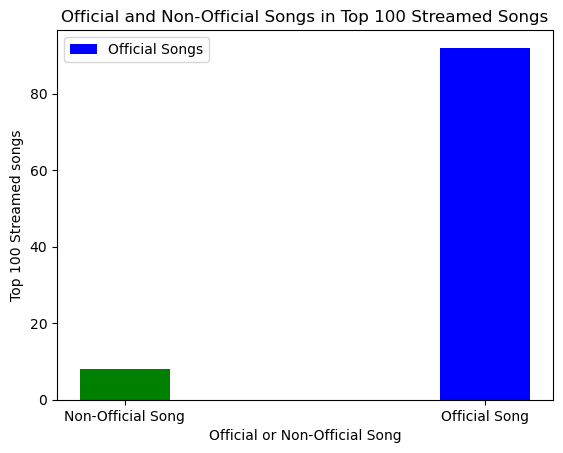

In [12]:
#offical video success against non official videos - compared to spotify track - Keval
df = spot_yt_df[["Artist", "Track", "Stream", "Views", "official_video"]]

official_video_df = df.rename(columns={'Stream': 'Spotify Stream','Views':'Youtube Views','official_video':'Official Video'})

official_sorted_stream = official_video_df.sort_values(by = "Spotify Stream", ascending = False).reset_index(drop=True)

top_100_streamed_songs = official_sorted_stream.head(100)

true_false_count = top_100_streamed_songs["Official Video"].value_counts().reset_index()
plt.bar(true_false_count["index"], top_100_streamed_songs["Official Video"].value_counts(), color=['blue', 'green'], width= 0.25,align='center')

tick_location = [value for value in true_false_count["index"]]
plt.xticks(tick_location, ["Official Song", "Non-Official Song"])

plt.legend(["Official Songs","Non-Official Song"])
plt.title("Official and Non-Official Songs in Top 100 Streamed Songs")

plt.ylabel("Top 100 Streamed songs")
plt.xlabel("Official or Non-Official Song")

Text(0.5, 0, 'Licensed or Non-Licensed Song')

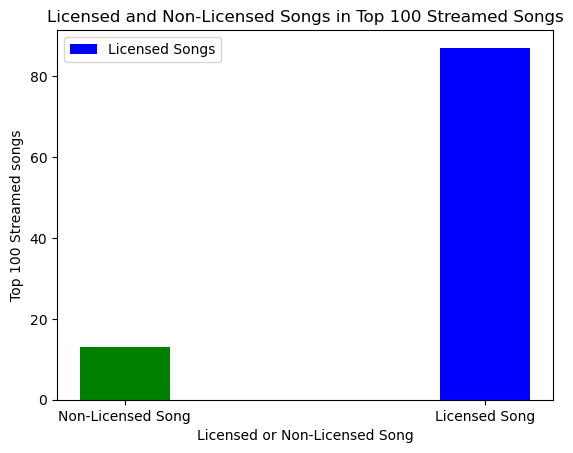

In [13]:
#Licensed song success against unLicensed video - compared to spotify track - Anyone
licensed_song = spot_yt_df[["Artist", "Track", "Stream", "Views", "Licensed"]]

licensed_song_df = licensed_song.rename(columns={'Stream': 'Spotify Stream','Views':'Youtube Views'})
licensed_sorted_stream = licensed_song_df.sort_values(by = "Spotify Stream", ascending = False).reset_index(drop=True)

top_100_licensed_unlicensed_songs = licensed_sorted_stream.head(100)


true_false_count_licensed = top_100_licensed_unlicensed_songs["Licensed"].value_counts().reset_index()
plt.bar(true_false_count_licensed["index"], top_100_licensed_unlicensed_songs["Licensed"].value_counts(), color=['blue', 'green'], width= 0.25,align='center')

tick_location = [value for value in true_false_count["index"]]
plt.xticks(tick_location, ["Licensed Song", "Non-Licensed Song"])

# count.plot(kind='bar')
plt.legend(["Licensed Songs","Non-Licensed Song"])
plt.title("Licensed and Non-Licensed Songs in Top 100 Streamed Songs")
plt.ylabel("Top 100 Streamed songs")
plt.xlabel("Licensed or Non-Licensed Song")

In [14]:
#API: Genre against popularity for Spotify - Keval